In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import sys, os
import numpy as np

In [34]:
# Configuración de rutas del proyecto
project_root = Path(os.getcwd()).parent
sys.path.append(str(project_root))

In [35]:
# Leer dataset procesado
df_encoded = pd.read_feather(project_root/'datasets/a01_ETL.feather')

In [36]:
# Importación de funciones personalizadas
from functions.f01_preprocesing_functions import df_explore, df_ValuesCheck

In [37]:
# ====================
# ANÁLISIS DE BALANCE DE CLASES
# ====================
print("\nAnalizando balance de clases (Churn):")


Analizando balance de clases (Churn):


In [38]:
# Distribución de la variable target
churn_dist = df_encoded['Churn'].value_counts(normalize=True) * 100
print(f"\nDistribución de Churn:\n{churn_dist}")


Distribución de Churn:
Churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64


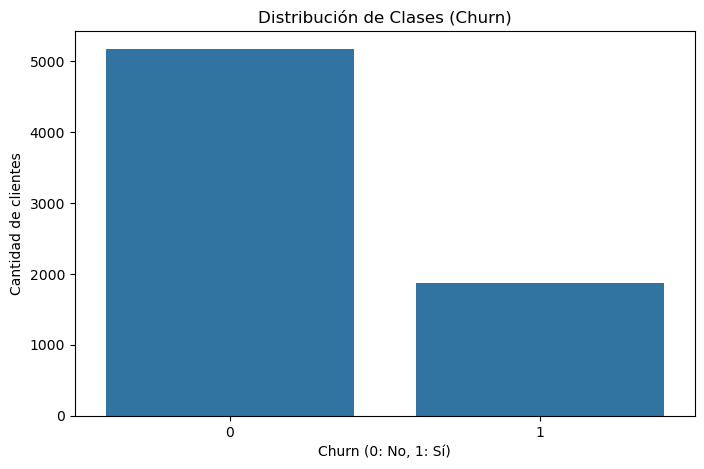

In [39]:
# Visualización
plt.figure(figsize=(8, 5))
sns.countplot(x='Churn', data=df_encoded)
plt.title('Distribución de Clases (Churn)')
plt.xlabel('Churn (0: No, 1: Sí)')
plt.ylabel('Cantidad de clientes')
plt.show()

In [40]:
# Guardar el porcentaje de churn para referencia
churn_percentage = churn_dist[1]
print(f"\nPorcentaje de clientes que hicieron churn: {churn_percentage:.2f}%")


Porcentaje de clientes que hicieron churn: 26.54%


In [41]:
# ====================
# MATRIZ DE CORRELACIÓN
# ====================
print("\nCalculando matriz de correlación...")


Calculando matriz de correlación...


In [42]:
# Calcular matriz de correlación
corr_matrix = df_encoded.corr()

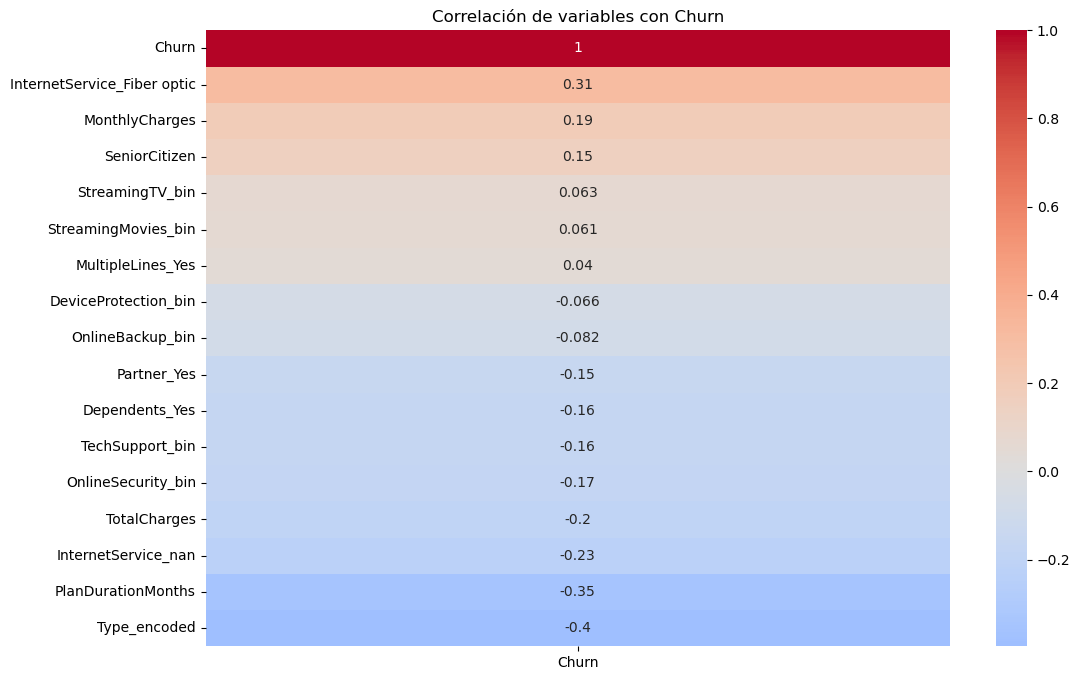

In [43]:
# Visualizar matriz de correlación con Churn
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix[['Churn']].sort_values(by='Churn', ascending=False), 
            annot=True, cmap='coolwarm', center=0)
plt.title('Correlación de variables con Churn')
plt.show()

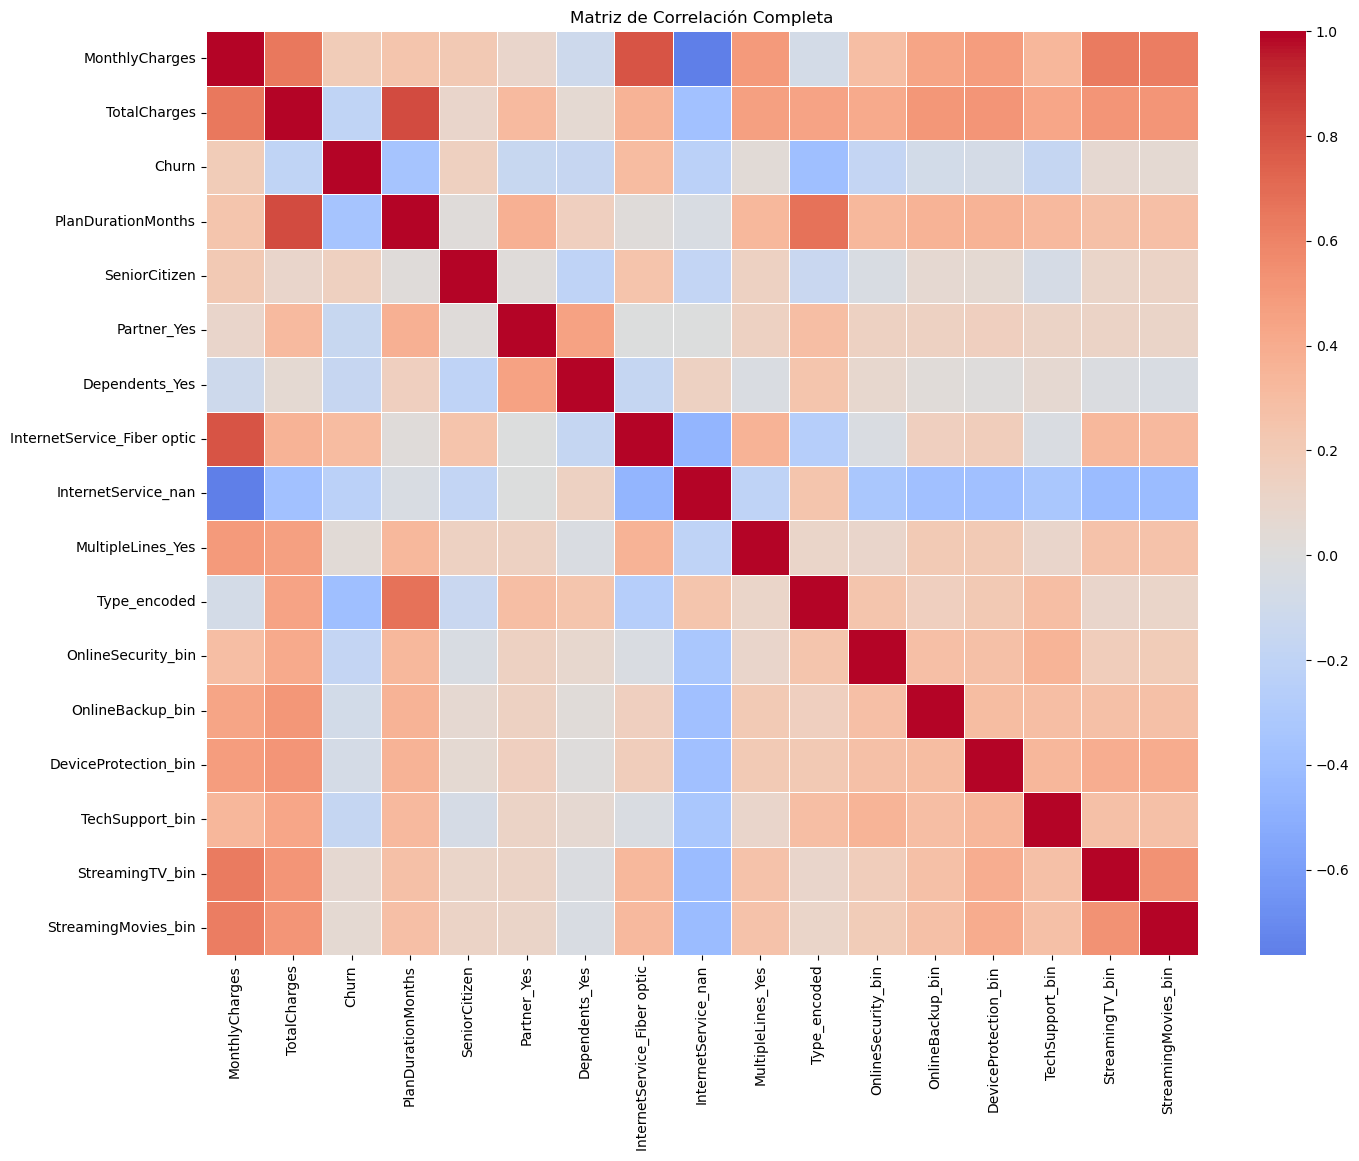

In [44]:
# Visualizar matriz completa (puede ser grande)
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0, 
            fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación Completa')
plt.show()

In [45]:
# ====================
# FEATURE ENGINEERING ADICIONAL
# ====================
print("\nCreando características adicionales...")


Creando características adicionales...


In [46]:
# Ratio TotalCharges/MonthlyCharges
df_encoded['ChargeRatio'] = df_encoded['TotalCharges'] / df_encoded['MonthlyCharges']
df_encoded['ChargeRatio'] = df_encoded['ChargeRatio'].replace([np.inf, -np.inf], np.nan).fillna(0)

In [47]:
# Cantidad de servicios adicionales contratados
services = ['OnlineSecurity_bin', 'OnlineBackup_bin', 'DeviceProtection_bin',
            'TechSupport_bin', 'StreamingTV_bin', 'StreamingMovies_bin']
df_encoded['TotalServices'] = df_encoded[services].sum(axis=1)

In [48]:
# Cliente de larga duración (más de 24 meses)
df_encoded['LongTermCustomer'] = (df_encoded['PlanDurationMonths'] > 24).astype(int)

In [49]:
# Verificar nuevas características
print("\nNuevas características creadas:")
print("- ChargeRatio: Ratio TotalCharges/MonthlyCharges")
print("- TotalServices: Cantidad de servicios adicionales contratados")
print("- LongTermCustomer: Indicador de cliente de larga duración (>24 meses)")


Nuevas características creadas:
- ChargeRatio: Ratio TotalCharges/MonthlyCharges
- TotalServices: Cantidad de servicios adicionales contratados
- LongTermCustomer: Indicador de cliente de larga duración (>24 meses)


In [50]:
# ====================
# NORMALIZACIÓN DE VARIABLES
# ====================
from sklearn.preprocessing import StandardScaler

In [51]:
print("\nNormalizando variables numéricas...")


Normalizando variables numéricas...


In [52]:
# Identificar columnas numéricas (excluyendo variables binarias y Churn)
numeric_cols = ['MonthlyCharges', 'TotalCharges', 'PlanDurationMonths', 
                'ChargeRatio', 'TotalServices']

In [53]:
# Aplicar StandardScaler
scaler = StandardScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

In [54]:
# Verificar normalización
print("\nEstadísticas después de normalización:")
print(df_encoded[numeric_cols].describe().loc[['mean', 'std']])


Estadísticas después de normalización:
      MonthlyCharges  TotalCharges  PlanDurationMonths   ChargeRatio  \
mean   -6.406285e-17 -3.783239e-17       -8.575342e-17 -2.017727e-18   
std     1.000071e+00  1.000071e+00        1.000071e+00  1.000071e+00   

      TotalServices  
mean   6.103626e-17  
std    1.000071e+00  


In [ ]:
# ====================
# CREANDO CONJUNTOS DE ENTRENAMIENTO Y VALIDACIÓN
# ====================

# Separando características y objetivo
features = df_encoded.drop('Churn', axis=1)
target = df_encoded['Churn']

from sklearn.model_selection import train_test_split

# Separando conjunto de entrenamiento y de validación
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345
)
print(f"Tamaño del conjunto de entrenamiento: {features_train.shape}")
print(f"Tamaño del conjunto de validación: {features_valid.shape}")


Guardando dataset final con nuevas características...


In [ ]:
# ====================
# GUARDADO FINAL
# ====================
print("\nGuardando datasets finales...")

# Guardar versión final de DF con nuevas características
df_encoded.to_feather(f'{project_root}/datasets/a02_ETL.feather')

# Opcional: Guardar una versión CSV
df_encoded.to_csv(f'{project_root}/datasets/a02_ETL.csv', index=False)

# Guardar características de entrenamiento y validación (DataFrames)
features_train.to_feather(f'{project_root}/datasets/features_train.feather')
features_valid.to_feather(f'{project_root}/datasets/features_valid.feather')

# Convertir Series a DataFrames antes de guardar
target_train.to_frame().to_feather(f'{project_root}/datasets/target_train.feather')
target_valid.to_frame().to_feather(f'{project_root}/datasets/target_valid.feather')

print("Todos los archivos se guardaron correctamente")

Opcional: Guardar una versión CSV
df_encoded.to_csv(f'{project_root}/datasets/dataframe_enriched.csv', index=False)

In [ ]:
print("""
Proceso completado exitosamente!
Dataset guardado con:
- Validación de datos
- Análisis de balance de clases
- Nuevas características de ingeniería
- Variables numéricas normalizadas
- División de conjuntos de entrenamiento y validación
""")



Proceso completado exitosamente!
Dataset guardado con:
- Validación de datos
- Análisis de balance de clases
- Nuevas características de ingeniería
- Variables numéricas normalizadas



In [58]:
# ====================
# ANÁLISIS ADICIONAL
# ====================
# Análisis de importancia de características preliminar
from sklearn.ensemble import RandomForestClassifier

In [59]:
# Preparar datos
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

In [60]:
# Entrenar modelo rápido para ver importancia de características
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

RandomForestClassifier(random_state=42)

In [61]:
# Visualizar importancia de características
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

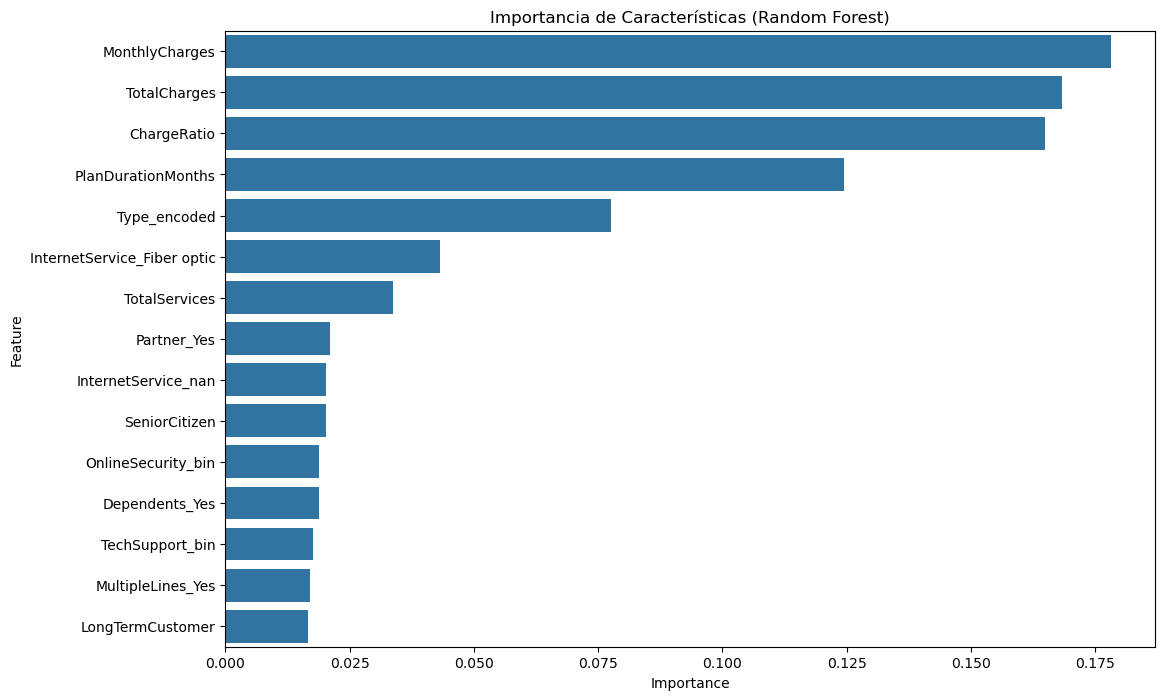

In [62]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15))
plt.title('Importancia de Características (Random Forest)')
plt.show()

Axes(0.125,0.11;0.775x0.77)


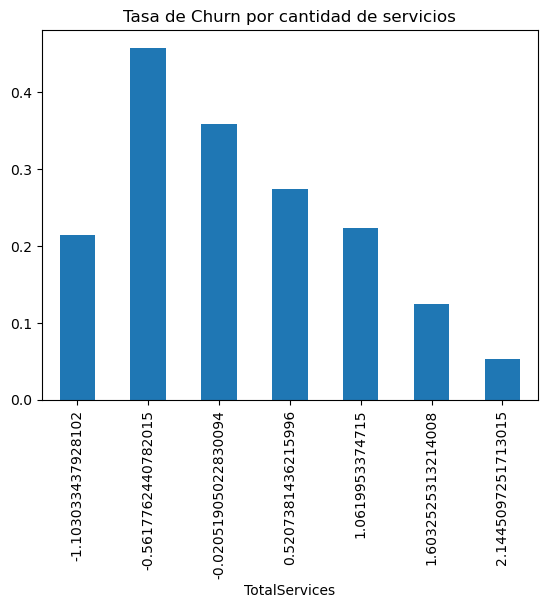

In [65]:
# Análisis para TotalServices
print(df_encoded.groupby('TotalServices')['Churn'].mean().plot(kind='bar'))
plt.title('Tasa de Churn por cantidad de servicios')
plt.show()